# Decision Tree Classifier
# KNN Classifier (Scikit-learn)

### Import Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## Load IRIS dataset

IRIS dataset as df to for better illustration ????

In [5]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

#### To have better understanding of the dataset, let's print it in tabular form.

**Note:** Ignore the code in the cell below; we will revisit it later when we introduce pandas.


In [6]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### As you can see the dataset is in the form of a `dictionay`. What are the `keys` of the dictionary?


In [9]:
df.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


#### What is the value of the key `data`? Assign the value to a variable `X`


In [7]:
x = iris.data


#### What is the `shape` of `X`?


In [8]:
x.shape

(150, 4)


#### What is the value of the key `target`? Assign the value to a variable `y`


In [12]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


#### What is the `shape` of `y`?


In [13]:
y.shape

(150,)


#### What is the value of the key `target_names`? Assign the value to a variable `target_names`


In [15]:
target_names = iris.target
target_names

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


#### What is the value of the key `feature_names`? Assign the value to a variable `feature_names`


In [16]:
features_names = iris.feature_names
features_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Print the 5th datapoint in your dataset `X`


In [48]:
fifth_datapoint = X[4]  #4 because it is the fifth element
print(fifth_datapoint)

[5.  3.6 1.4 0.2]



#### Print the features and target label of flower 1 to 5.


#### Find the `max`, `min` and `mean` value of each feature in the dataset `X`

Helper: you can iterate through the columns of the dataset and use the `np.max()`, `np.min()` and `np.mean()` functions to find the required values. or the better way is to use `axis` parameter of the `np.max()`, `np.min()` and `np.mean()` functions.

In [49]:
mean = np.max(X)
print("mean is", mean)

max = np.max(X)
print("max is", max)

min = np.min(X)
print("min is", min)

mean is 7.9
max is 7.9
min is 0.1



#### Iterate over all datapoints in `X` and calculate the `area` of Sepal and Petal for each flower in the dataset.

`Sepal area` = `Sepal length` * `Sepal width`

`Petal area` = `Petal length` * `Petal width`


In [50]:
for Sepal_length, Sepal_width, Petal_length, Petal_width in X:
    Sepal_area = Sepal_length * Sepal_width
    Petal_area = Petal_length * Petal_width

print("Sepal area is", Sepal_area)
print("Petal area is", Petal_area)

Sepal area is 17.700000000000003
Petal area is 9.18


## Decision Tree

### 0 - Data prepraration

#### Split the dataset into training and testing set using `train_test_split` function. Use `random_state=42` and `test_size=0.33`

Helper: Use `train_test_split` function from `sklearn.model_selection` and pass `X`, `y` and the parameters `random_state=42` and `test_size=0.33` to the function.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.33)


#### What is the `shape` of `X_train`, `X_test`, `y_train` and `y_test`?

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(100, 4)
(100,)
(100,)
(100,)


#### Locate `X_train`, `X_test`, `y_train` and `y_test` in the the folwoing flow chart.

Your Answer: doesnt load 

<img src="./Scikit-learn-flow.jpeg" width="500" hight="400" />

### 1 - Train the model on the training data

#### Create a decision tree classifier

Helper: Make an object form `DecisionTreeClassifier` class from `sklearn.tree` package - Use default constructor to initialize the object

In [67]:
object_form = DecisionTreeClassifier()

#### Train the model on the training data

Helper: Use `fit` method of the object created in the previous step. Pass `X_train` and `y_train` as arguments to the `fit` method.

In [68]:
object_form.fit(x_train, y_train)

DecisionTreeClassifier()

#### Visualize the decision tree model

**Note:** `model`  in the code below is the name of classifier object. You may change it if you have used a different name.

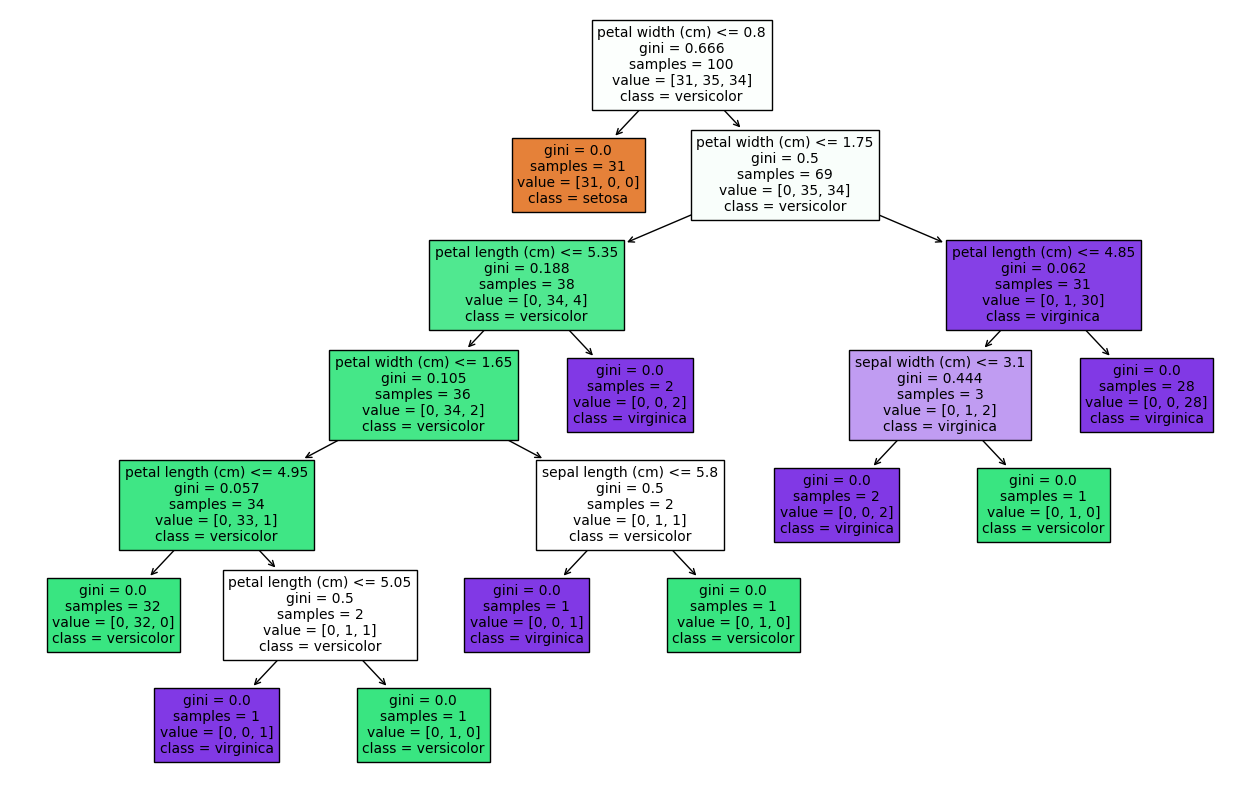

In [69]:
#Solution
plt.figure(figsize=(16,10))
plot_tree(object_form, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, fontsize=10)
plt.show()

### 2 - Test the model: Make predictions on the test data

#### Manually predict the label of one datapoint form test set. Take one datapoit from test set and use the decision tree shown above to predict its lable.

In [70]:
print("sample data point", X_test[0])
print("sample data point label", y_test[0])

sample data point [6.1 2.8 4.7 1.2]
sample data point label 1


#### Write your manual prediction here:

Your Answer:

#### Predict the labels of the test set

Helper: Use `predict` method of the classifier object created in the previous step. Pass `X_test` as an argument to the `predict` method.

In [74]:
helper = object_form.predict(X_test)
helper

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

#### Print `y_pred` and `y_test`

In [78]:
y_pred = object_form.predict(X_test) 
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

### 3 - Evaluate the model 

#### What percentage of elements in `y_pred` match the corresponding elements in `y_test`?

Helper: Use `accuracy_score` function from `sklearn.metrics` package and pass `y_test` and `y_pred` as arguments to the function.


In [80]:
evaluate = accuracy_score(y_test, y_pred)
evaluate

0.98

## K Nearest Neighbors (KNN) with Scikit-learn

### Repeat the steps of `create the classifier object`, fit (model), predict (labels), and evaluating for the KNN classifier.

Helper: Use `KNeighborsClassifier` class from `sklearn.neighbors` package to create the classifier object. Instantiate it with the `KNeighborsClassifier(n_neighbors=4)` constructor.

In [91]:
for i in range(1, 15):

    model = KNeighborsClassifier(n_neighbors=i)
    #model = KNeighborsClassifier(n_neighbors=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #y_pred == y_test

    a = accuracy_score(y_test, y_pred)
    print(f"{a} {i}")

0.98 1
0.98 2
0.98 3
0.98 4
0.98 5
0.98 6
0.98 7
0.98 8
0.98 9
0.98 10
1.0 11
1.0 12
1.0 13
1.0 14


#### Find the optimal value of `n_neighbors` for KNN classifier. 

Helper: Calculate the accuracy of the model for different values of `k` and plot the accuracy vs `k` graph. You may choose the range of `k` from 1 to 10.


In [82]:
K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
accs = []
#your code here


#### Report the optimal value of `k` for the KNN classifier and the corresponding accuracy.

Your Answer:

#### (Optional) Finding the optimal value of `k` using `GridSearchCV` 
We split the dataset to test and train using `train_test_split` function. Howevern we can also use `cross-validation` to split the dataset `X` and `y`. 

For example, if we use `cv=5`, the dataset will be split into 5 parts. 4 parts will be used for training and 1 part will be used for testing. This process will be repeated 5 times on multiple splits and the average accuracy will be calculated.

<img src="./cross_validation.jpg" width="800" hight="200" /> 

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
K = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12, 13, 14, 15]
grid = GridSearchCV(knn_model, param_grid={'n_neighbors': K}, cv=3)

GridSearchCV object is like the scikit learn model and we can use the `fit` methodover it. Here, we pass the `X` and `y` to the `fit` method.

In [ ]:
grid.fit(X, y)

We can see the result of the grid search using the `cv_results_` attribute of the `GridSearchCV` object. The `cv_results_` attribute is a dictionary where each key is a string and each value is a list of values. We turned this into a pandas `DataFrame` to make it easier to read.

In [ ]:
grid.cv_results_
result = pd.DataFrame(grid.cv_results_)
result

Plotting the accuracy vs `k` graph using `GridSearchCV`.

In [ ]:
plt.plot(K, result['mean_test_score'], label = "GridSearchCV results")

#### (Optional) What is `split0_test_score`, `split1_test_score`, `split2_test_score`, and	`mean_test_score` in the table above?

Your Answer:

#### (Optional) Report the optimal value of `k` for the KNN classifier using `GridSearchCV`?

Your Answer:

#### (Optional) Fiind the mean test score for Decision Tree Classifier using `cross-validation` with `cv=3`.

## KNN and Decision Tree Classifiers Comparison

#### Report the higher accuracy of the two classifiers. Which one was better?

Your Answer: